In [39]:
# Synthetic dataset
from sklearn.datasets import make_classification

#Data processing
import pandas as pd
import numpy as np
from collections import Counter 
import random
from datetime import datetime, timedelta
#Visualization
import matplotlib.pyplot as plt 

#Model and performance
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [40]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2, 
                           n_clusters_per_class=1,
                           weights=[0.995,0.001],
                           class_sep=0.5, random_state=0)

#Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})

#Check the target distribution
df['target'].value_counts(normalize = True)

target
0    0.991
1    0.009
Name: proportion, dtype: float64

In [41]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

# Analyze class distribution in the training set
class_counts = Counter(y_train)
majority_class, majority_count = sorted(class_counts.items())[0]
minority_class, minority_count = sorted(class_counts.items())[-1]

print(f"The training dataset has {majority_count} records for the majority class ({majority_class})")
print(f"and {minority_count} records for the minority class ({minority_class})")

The number of records in the training dataset is 800
The number of records in the test dataset is 200
The training dataset has 793 records for the majority class (0)
and 7 records for the minority class (1)


In [42]:
# Train the one support vector machine (SVM) model
one_class_svm = OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [43]:
# Predict the anomalies 
prediction = one_class_svm.predict(X_test)

#Change the anomalies' values and to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]

#Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       198
           1       0.00      0.00      0.00         2

    accuracy                           0.96       200
   macro avg       0.49      0.48      0.49       200
weighted avg       0.98      0.96      0.97       200



In [44]:
# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)

#Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold: .2f}')

# Check the model performance at 2% threshold 
customized_prediction = [1 if i < score_threshold else 0 for i in score]

#Check the prediction performance 
print(classification_report(y_test, customized_prediction))

The customized score threshold for 2% of outliers is  1.13
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       198
           1       0.00      0.00      0.00         2

    accuracy                           0.97       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.98      0.97      0.97       200



In [45]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_customized'] = customized_prediction

In [46]:
df_test.to_csv('svm_test_results.csv', index=False)


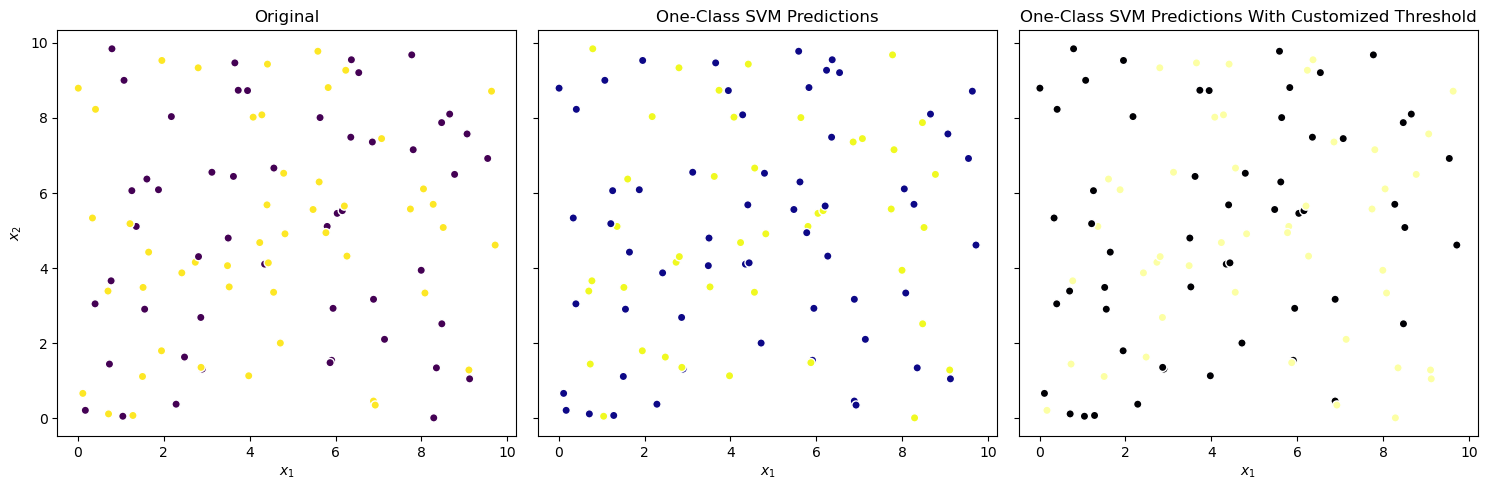

In [47]:
# Example data
x1 = np.random.uniform(0, 10, 100)
x2 = np.random.uniform(0, 10, 100)
y_test = np.random.choice([0, 1], size=100)  # Ground truth
one_class_svm_prediction = np.random.choice([0, 1], size=100)  # SVM prediction
one_class_svm_prediction_customized = np.random.choice([0, 1], size=100)  # Customized threshold prediction

# Create subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

# Ground truth
ax0.set_title('Original')
scatter0 = ax0.scatter(x1, x2, c=y_test, cmap='viridis', edgecolors='w')
ax0.set_xlabel('$x_1$')
ax0.set_ylabel('$x_2$')

# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
scatter1 = ax1.scatter(x1, x2, c=one_class_svm_prediction, cmap='plasma', edgecolors='w')
ax1.set_xlabel('$x_1$')

# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
scatter2 = ax2.scatter(x1, x2, c=one_class_svm_prediction_customized, cmap='inferno', edgecolors='w')
ax2.set_xlabel('$x_1$')

# Clean and show plot
plt.tight_layout()
plt.show()

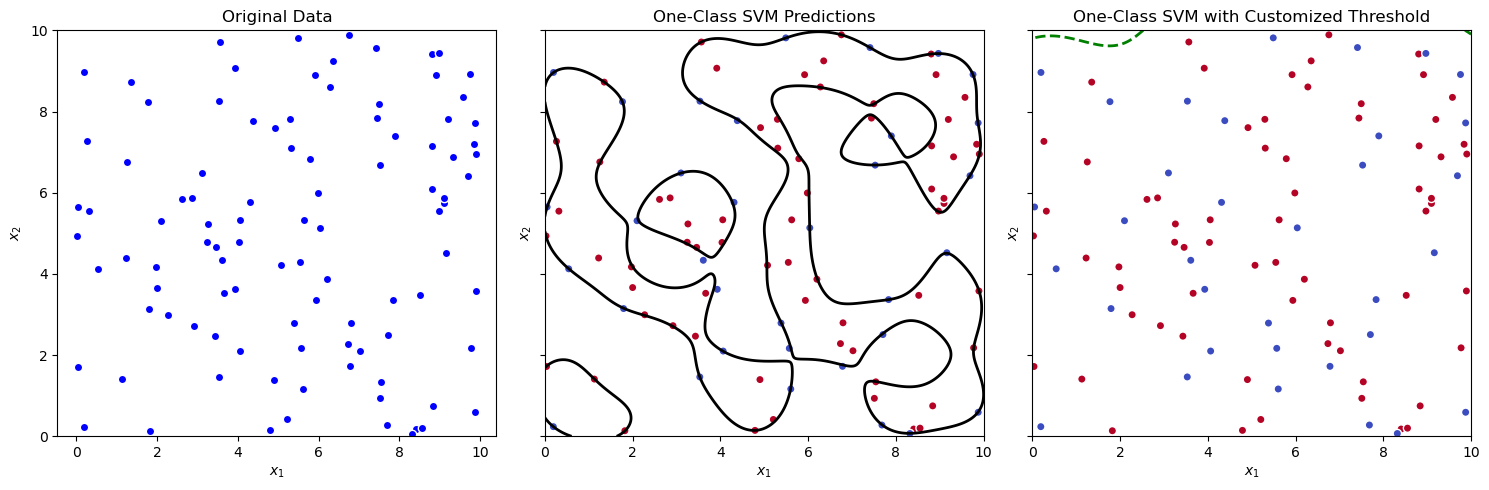

In [48]:
# Generate synthetic data
x1 = np.random.uniform(0, 10, 100)
x2 = np.random.uniform(0, 10, 100)
X = np.vstack((x1, x2)).T  # Combine x1 and x2 into a 2D array for fitting SVM

# Fit One-Class SVM model (with RBF kernel)
one_class_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')  # Adjust 'nu' and 'gamma' for outlier detection
one_class_svm.fit(X)

# Get decision function values (distance to the separating hyperplane)
y_pred = one_class_svm.predict(X)

# Define the decision function and margins
xx, yy = np.meshgrid(np.linspace(0, 10, 500), np.linspace(0, 10, 500))
Z = one_class_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the subplots
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

# Ground truth plot
ax0.set_title('Original Data')
scatter0 = ax0.scatter(x1, x2, c='blue', label='Inliers', edgecolors='w')
ax0.set_xlabel('$x_1$')
ax0.set_ylabel('$x_2$')

# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
scatter1 = ax1.scatter(x1, x2, c=y_pred, cmap='coolwarm', edgecolors='w', label='Predictions')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')

# Plot the decision function and margins
ax1.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')  # Decision boundary (hyperplane)
ax1.contour(xx, yy, Z, levels=[-1], linewidths=2, colors='r', linestyles='dashed')  # Upper margin
ax1.contour(xx, yy, Z, levels=[1], linewidths=2, colors='r', linestyles='dashed')   # Lower margin

# One-Class SVM Predictions with Customized Threshold
ax2.set_title('One-Class SVM with Customized Threshold')
scatter2 = ax2.scatter(x1, x2, c=y_pred, cmap='coolwarm', edgecolors='w', label='Predictions')
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')

# Custom threshold for outlier detection (Adjust based on your own data)
outlier_threshold = -0.1  # This threshold can be tuned based on the decision function value
ax2.contour(xx, yy, Z, levels=[outlier_threshold], linewidths=2, colors='g', linestyles='dashed')  # Custom outlier boundary

# Display all plots
plt.tight_layout()
plt.show()


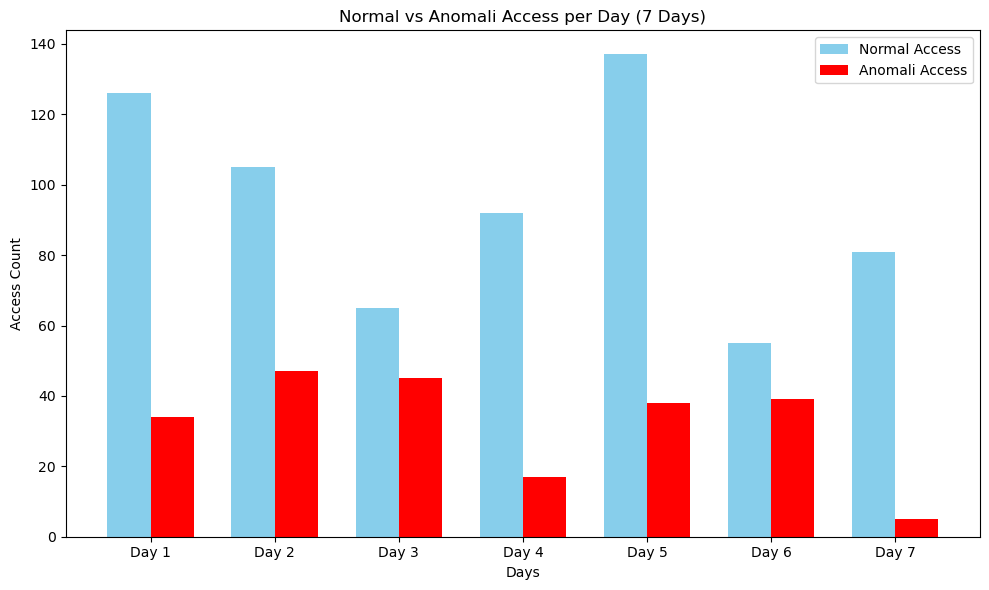

In [49]:
# Generate example data
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
normal_access = np.random.randint(50, 150, size=7)  # Normal access counts per day
anomaly_access = np.random.randint(0, 50, size=7)   # Anomaly access counts per day

# Create a bar chart
x = np.arange(len(days))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, normal_access, width, label='Normal Access', color='skyblue')
bars2 = ax.bar(x + width/2, anomaly_access, width, label='Anomali Access', color='red')

# Add labels, title, and legend
ax.set_xlabel('Days')
ax.set_ylabel('Access Count')
ax.set_title('Normal vs Anomali Access per Day (7 Days)')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

        Date     IP Address  Normal Access  Anomaly Access  Normal Login  \
0 2025-01-01  192.168.1.253             89               4            30   
1 2025-01-02  192.168.1.239             62              20            31   
2 2025-01-03   192.168.1.38            117              40            91   
3 2025-01-04   192.168.1.39            129              45            98   
4 2025-01-05   192.168.1.55            120              22            91   
5 2025-01-06  192.168.1.225             59              42            60   
6 2025-01-07  192.168.1.113            144              17            69   

   Anomaly Login Access Status Login Status  
0             22        Normal      Anomaly  
1              3        Normal       Normal  
2              5        Normal       Normal  
3              7        Normal       Normal  
4             24        Normal       Normal  
5              4        Normal       Normal  
6              8        Normal       Normal  


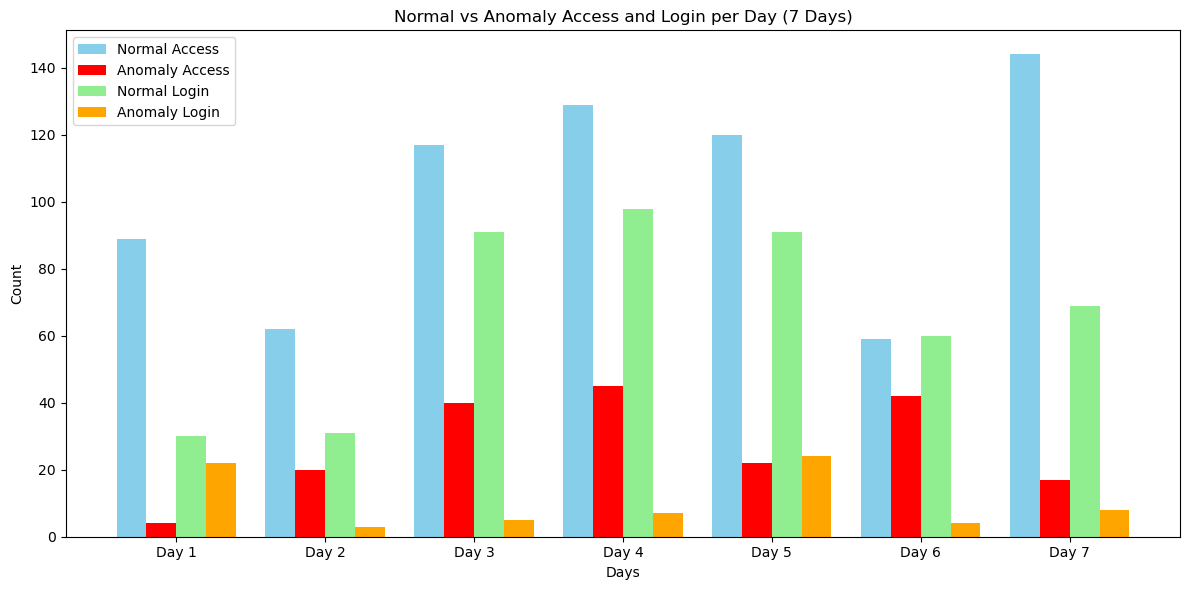

In [50]:
# Generate example data
days = ['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7']
normal_access = np.random.randint(50, 150, size=7)  # Normal access counts per day
anomaly_access = np.random.randint(0, 50, size=7)   # Anomaly access counts per day
normal_login = np.random.randint(30, 100, size=7)   # Normal login counts per day
anomaly_login = np.random.randint(0, 30, size=7)    # Anomaly login counts per day

# Generate IP addresses
ip_addresses = [f"192.168.1.{random.randint(1, 255)}" for _ in range(7)]

# Generate timestamps (Assume one access per day)
start_date = datetime(2025, 1, 1)
timestamps = [start_date + timedelta(days=i) for i in range(7)]

# Create a function to randomly assign normal or anomaly labels
def generate_status(count, anomaly_threshold=0.3):
    return ["Normal" if random.random() > anomaly_threshold else "Anomaly" for _ in range(count)]

# Create a DataFrame for access data with IP, Status, and Label
access_data = pd.DataFrame({
    'Date': timestamps,
    'IP Address': ip_addresses,
    'Normal Access': normal_access,
    'Anomaly Access': anomaly_access,
    'Normal Login': normal_login,
    'Anomaly Login': anomaly_login,
    'Access Status': ['Normal' if access > 50 else 'Anomaly' for access in normal_access],
    'Login Status': ['Normal' if login > 30 else 'Anomaly' for login in normal_login]
})

# Display the dataframe to check the result
print(access_data)

# Create a bar chart for visualizing access vs login
x = np.arange(len(days))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for normal access, anomaly access, normal login, and anomaly login
bars1 = ax.bar(x - 1.5*width, normal_access, width, label='Normal Access', color='skyblue')
bars2 = ax.bar(x - 0.5*width, anomaly_access, width, label='Anomaly Access', color='red')
bars3 = ax.bar(x + 0.5*width, normal_login, width, label='Normal Login', color='lightgreen')
bars4 = ax.bar(x + 1.5*width, anomaly_login, width, label='Anomaly Login', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Days')
ax.set_ylabel('Count')
ax.set_title('Normal vs Anomaly Access and Login per Day (7 Days)')
ax.set_xticks(x)
ax.set_xticklabels(days)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
